## Modeling of Acoustic Scattering by a Cylindrical Obstacle in an Infinite Domain

In [21]:
import numpy as np
import meshio
from scat_cylinder import u_exact, plot_displacement_amplitude, plot_mesh

- $ r_i$: Inner radius [m].
- $ r_e$: Outer radius [m].
- $ r_a$: Radius of the outermost layer [m].
- $ k$: Wave number [a.u.].

In [2]:
r_i = 1.0 # Inner radius
r_e = 10.0 # Outer radius
r_a = 11 # Radius of the outermost layer
k = 1.0  # Wave number

### Analytical Solution

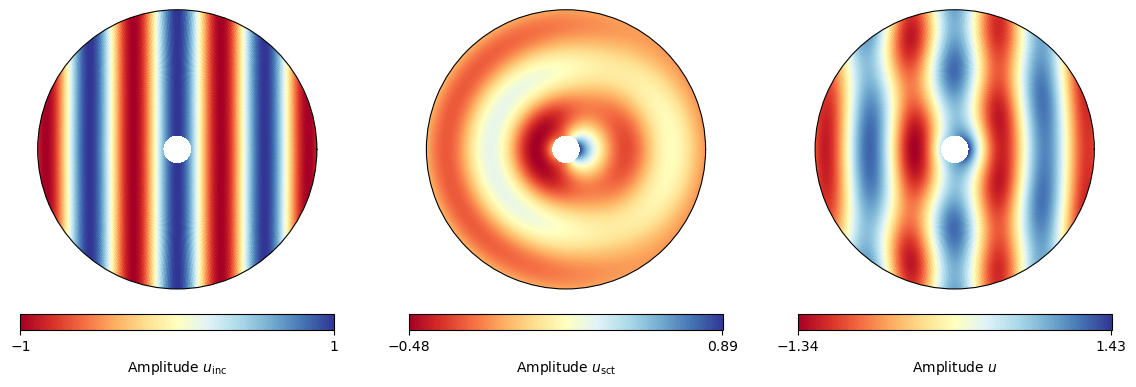

In [3]:
# Define the grid in polar (cylindrical) coordinates
r = np.linspace(r_i, r_e, 501)  # Radial distance from 0.1 to 10 (avoid 0 to prevent singularity)
theta = np.linspace(0, 2 * np.pi, 501)  # Angle from 0 to 2*pi
R, Theta = np.meshgrid(r, theta)  # Create meshgrid for r and theta

# Calculate the displacement
u_inc, u_scn, u = u_exact(R, Theta, r_i, k)  # Calculate the displacement

# Call the function with the appropriate arguments
plot_displacement_amplitude(R, Theta, r_i, u_inc, u_scn, u)

### Finite Element Method (FEM)

In [221]:
import gmsh
import numpy as np
import matplotlib.pyplot as plt
import meshio

# Initialize gmsh and read the mesh file
gmsh.initialize()
gmsh.open("u_Total.pos")

# Extract nodes and elements
node_tags, node_coords, _ = gmsh.model.mesh.getNodes()
element_types, element_tags, element_node_tags = gmsh.model.mesh.getElements()

# Convert element_node_tags to a NumPy array and reshape it
elemets = np.array(element_node_tags[0]).reshape(-1, 3)

# Extract the 'u' data from the mesh file
u_data = gmsh.view.getHomogeneousModelData(0, 1)
u_id = u_data[1]
u_data = np.array(u_data[2]).reshape(-1, 3)

# Close gmsh
gmsh.finalize()

#u_values = np.array([np.sum(values) for values in u_data[2]])
# Reshape node coordinates (each node has 3 coordinates: x, y, z)
node_coords = node_coords.reshape(-1, 3)

# Verificar la nueva forma del arreglo de elementos
print(np.shape(elemets))


Info    : Reading 'u_Total.pos'...
Info    : 4319 nodes
Info    : 8426 elements
Info    : Done reading 'u_Total.pos'
(8426, 3)


In [ ]:
# Crear el diccionario
node_u_data_dict = {}
for elem, u_vals in zip(elemets, u_data):
    for node, u_val in zip(elem, u_vals):
        node_u_data_dict[node] = u_val



# Crear el diccionario node_tags -> node_coords
node_coords_dict = {}
for tag, coord in zip(node_tags, node_coords):
    node_coords_dict[tag] = coord
    


# Añadir los valores de desplazamiento a las coordenadas de los nodos
for tag, coord in zip(node_tags, node_coords):
    node_coords_dict[tag][2] = node_u_data_dict[tag]

   

# Crear un nuevo arreglo de nodos con los valores de desplazamiento
pts = np.array([coord for coord in node_coords_dict.values()])

In [253]:
import matplotlib.tri as tri

In [261]:
np.min(pts[:,1])

-1.0

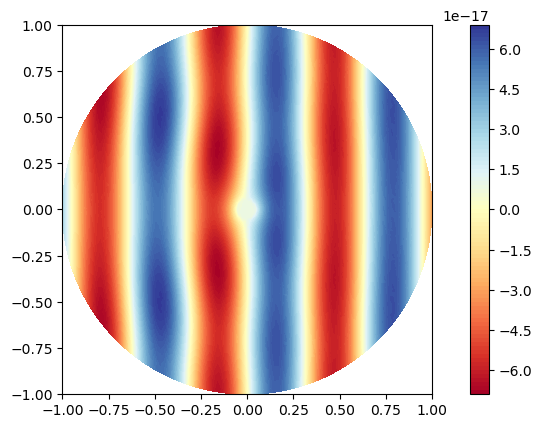

In [279]:
fig = plt.figure()
plt.tricontourf(pts[:,0], pts[:,1], pts[:,2]*np.exp(1j*np.pi/2), cmap="RdYlBu", levels=100)
plt.colorbar()
plt.axis("image")
plt.show()

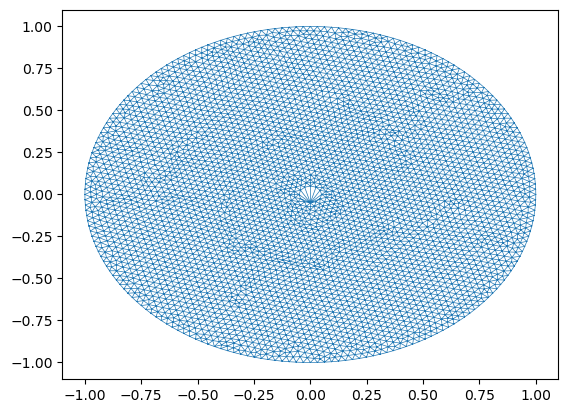

In [269]:
# plot the mesh
plt.triplot(pts[:,0], pts[:,1], linewidth=0.5)
plt.show()

Computational time around 2 seconds.

### Physics informed neural networks (PINNs)